# 单因子检验

In [1]:
from factor_analysis import *

In [2]:
# 关闭通知
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.ERROR)

### 基础设置

In [3]:
# 研究时间
start_date = '2018-01-01'        # 【example】：2020-01-01
end_date = '2023-01-01'          # 【example】：2022-11-01
# 研究标的 
index_item = '000852.XSHG'       # 【example】：全A 000985.XSHG 中证1000 000852.XSHG  #input("index:")

# 股票池
index_fix = INDEX_FIX(start_date,end_date,index_item)
# 获取日期 和 标的
stock_list = index_fix.columns.tolist()
date_list = index_fix.index.tolist()

### 因子构建

In [4]:
#获取因子数据
f_cfoa = Factor('cash_flow_from_operating_activities_mrq_0')/Factor('total_assets_mrq_0')
cfoa = execute_factor(f_cfoa,stock_list,start_date,end_date)

### 数据清洗

In [12]:
cfoa_neu = data_clean(cfoa,index_fix,index_item)

100%|██████████| 1215/1215 [00:04<00:00, 251.74it/s]


In [13]:
cfoa_neu

,000006.XSHE,000010.XSHE,000011.XSHE,000016.XSHE,000018.XSHE,000019.XSHE,000025.XSHE,000028.XSHE,000030.XSHE,000032.XSHE,...,688707.XSHG,688711.XSHG,688733.XSHG,688739.XSHG,688776.XSHG,688778.XSHG,688788.XSHG,688789.XSHG,688798.XSHG,688800.XSHG
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,0.127313,0.660750,-1.935531,-1.434536,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,0.124817,0.662004,-1.930656,-1.437840,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,0.124769,0.661196,-1.930397,-1.437028,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,0.116995,0.660605,-1.934516,-1.433590,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,0.105725,0.663583,-1.937658,-1.433764,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.150033,NaN,0.539778,-0.669870,NaN,1.282710,-1.381675,0.091251,-0.439303,-0.430055,...,-0.362719,-1.978230,-0.417662,-0.206105,-0.874048,-2.270882,0.035196,-0.100214,-1.999718,-0.401399
2022-12-27,1.139648,NaN,0.540025,-0.669912,NaN,1.279831,-1.375595,0.091710,-0.437295,-0.430331,...,-0.365428,-1.981587,-0.416630,-0.208352,-0.875085,-2.277658,0.039739,-0.099164,-2.008596,-0.403711
2022-12-28,1.136454,NaN,0.540509,-0.657196,NaN,1.281044,-1.372935,0.088547,-0.435433,-0.433482,...,-0.369823,-1.983102,-0.413280,-0.209642,-0.876237,-2.282356,0.048463,-0.099541,-2.012080,-0.402975


### 单因子检验

In [14]:
ic,performance = Quick_Factor_Return_N_IC(cfoa_neu,20,index_item,'cfoa_neu')

{'name': 'cfoa_neu', 'IC mean': 0.0217, 'IC std': 0.0471, 'IR': 0.4594, 'IR_ly': 0.7261, 'IC>0': 0.6636, 'ABS_IC>2%': 0.6636, 't_stat': 15.881}


<Axes: title={'center': 'CUM_IC'}, xlabel='datetime'>

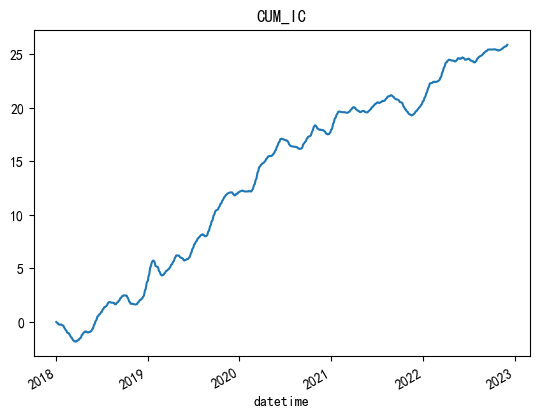

In [15]:
ic.cumsum().plot(title = 'CUM_IC')

<Axes: title={'center': 'IC_MONTHLY'}, xlabel='datetime'>

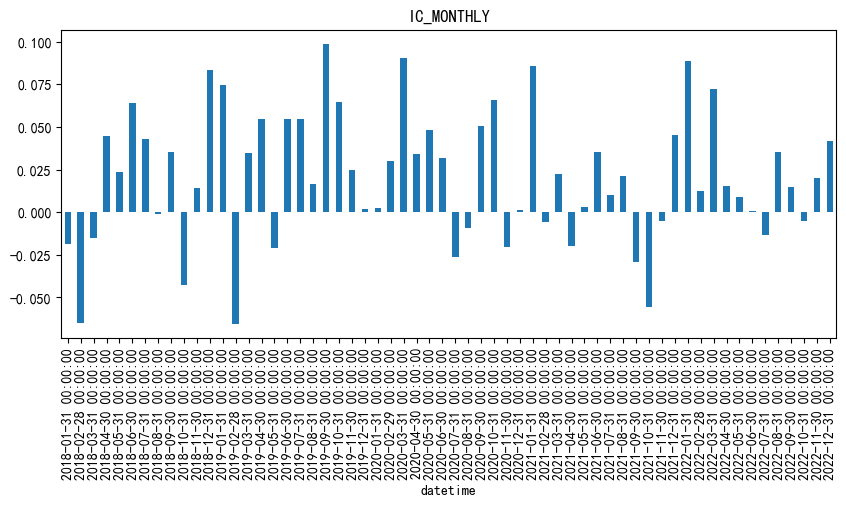

In [16]:
ic.resample('M').mean().plot(kind = 'bar',figsize=(10,4),title = 'IC_MONTHLY')

### 因子收益率

In [17]:
result,report = factor_ret_tvalue(cfoa_neu,20,index_item,'cfoa')

{'name': 'cfoa', 'Tvalue mean': 1.1462, 'Pvalue mean': 0.3919, 'pvalue_abs < 1%': 0.0812}


### 分层效应检验

 当前：1200 / 总量：1215

<Axes: title={'center': 'Group inspection'}, xlabel='date'>

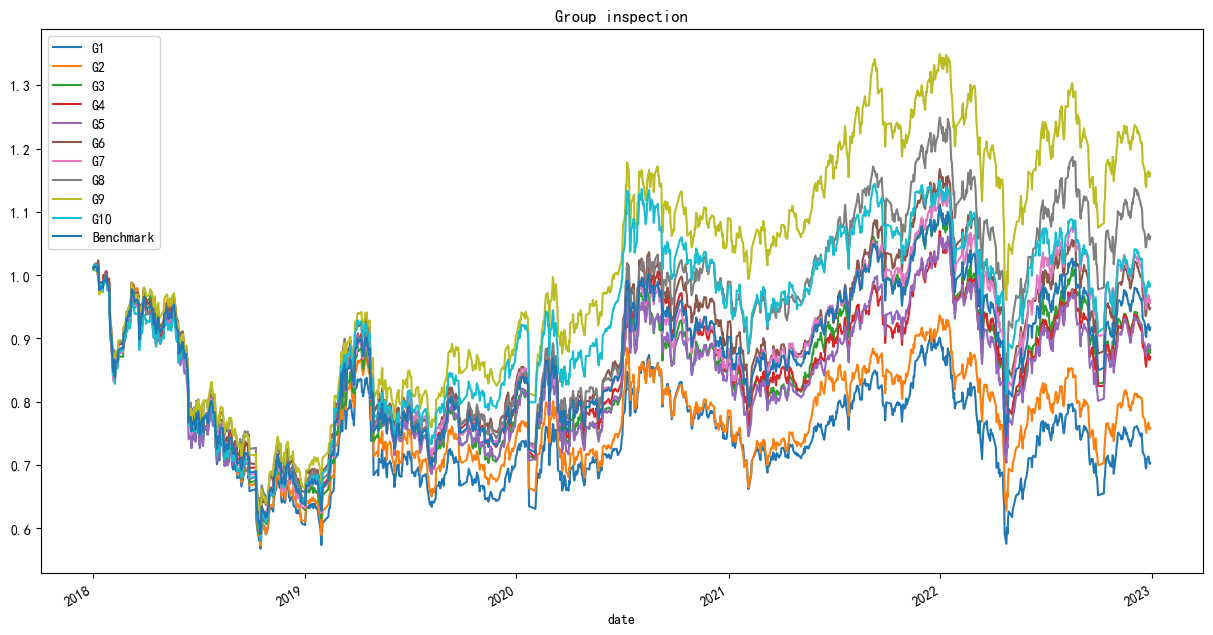

In [19]:
group_return,turnover = group_g(cfoa_neu,20,10,index_item)
group_return['Benchmark'] = group_return.mean(axis = 1)
group_return = (group_return+1).cumprod()
group_return.plot(figsize = (15,8),title = 'Group inspection')

In [20]:
yby_performance = np.log(group_return).diff().dropna().resample('Y').sum().T
yby_performance -= yby_performance.loc['Benchmark']
yby_performance = yby_performance.replace(0.,np.nan).dropna(how = 'all')
yby_performance

date,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
G1,-0.055151,-0.072324,-0.027111,-0.055957,-0.057478
G2,-0.044179,-0.037478,-0.056797,-0.031311,-0.019995
G3,-0.010413,-0.013083,-0.006241,0.032524,-0.041542
G4,0.009234,-0.009225,-0.023907,-0.011356,-0.014809
G5,0.011401,-0.049835,-0.007162,-0.000133,0.015147
G6,0.028420,-0.003241,-0.000932,0.025451,-0.018002
G7,-0.008800,0.024644,-0.037264,0.046457,0.022200
G8,0.012700,0.000368,0.077884,0.026116,0.027373
G9,0.042286,0.071776,0.075869,0.006691,0.041054
G10,0.007978,0.081822,-0.003316,-0.049051,0.037626


<Axes: title={'center': 'Grouping year-on-year excess annualized returns'}>

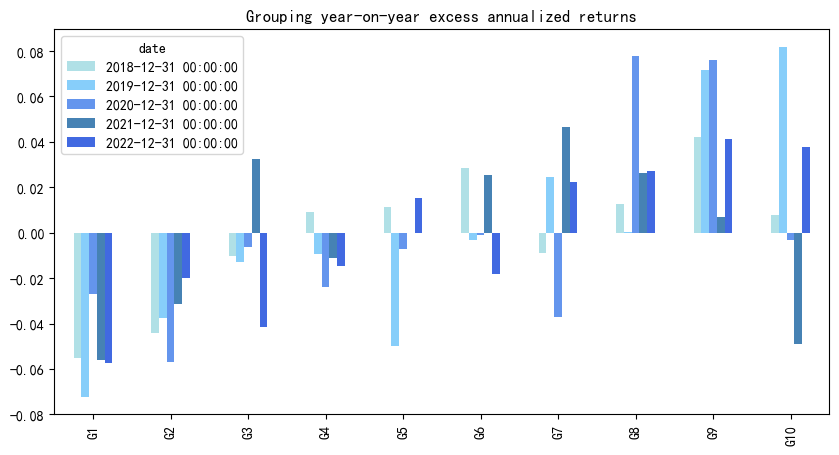

In [21]:
yby_performance.plot(kind = 'bar',figsize = (10,5),title = 'Grouping year-on-year excess annualized returns',color = ['powderblue','lightskyblue','cornflowerblue','steelblue','royalblue'])

### 多空效应检验

<Axes: title={'center': 'Long-short performance'}, xlabel='date'>

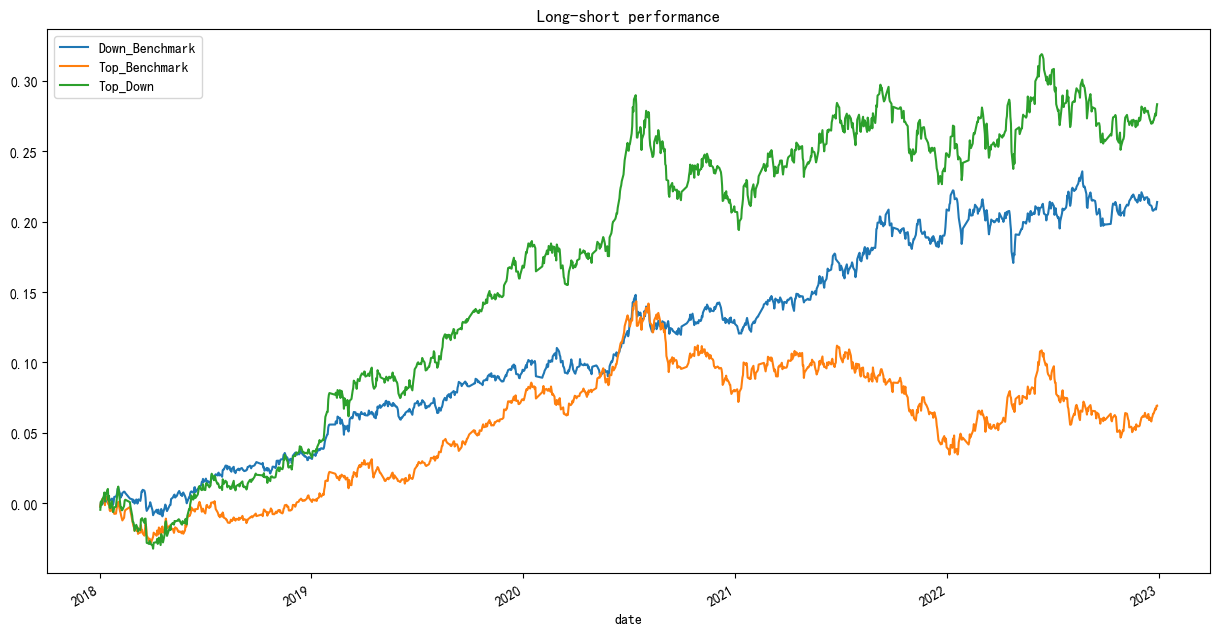

In [22]:
g = 10
Down_Benchmark = -(group_return['G1'] - group_return['Benchmark'])
Top_Benchmark = group_return['G{}'.format(g)] - group_return['Benchmark']
Top_Down = group_return['G{}'.format(g)] - group_return['G1']
TBD = pd.concat([Down_Benchmark,Top_Benchmark,Top_Down],axis = 1)
TBD.columns = ['Down_Benchmark','Top_Benchmark','Top_Down']
TBD.plot(figsize = (15,8),title = 'Long-short performance')

### 换手率

G1     0.293867
G2     0.379617
G3     0.429281
G4     0.455201
G5     0.474271
G6     0.476965
G7     0.459671
G8     0.438163
G9     0.418954
G10    0.327011
dtype: float64


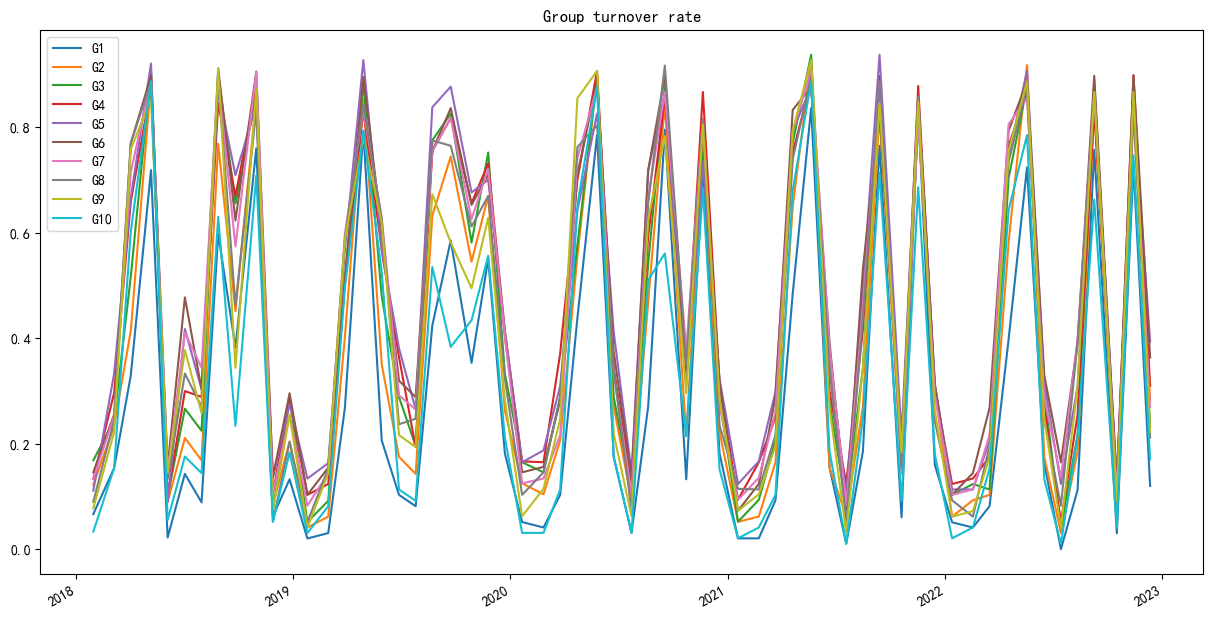

In [23]:
turnover.plot(figsize = (15,8),title = 'Group turnover rate')
print(turnover.mean())